In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

infrared_thermography_temperature = fetch_ucirepo(id=925) # fetch dataset

X = infrared_thermography_temperature.data.features # data as pandas dataframes
y = infrared_thermography_temperature.data.targets

print(infrared_thermography_temperature.metadata)
print(infrared_thermography_temperature.variables)

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

In [3]:
print(f"Number of independent variables: {X.shape[1]}")

print(f"Number of dependent variables: {y.shape[1]}")

Number of independent variables: 33
Number of dependent variables: 2


In [4]:
print(y)
print(X)

      aveOralF  aveOralM
0        36.85     36.59
1        37.00     37.19
2        37.20     37.34
3        36.85     37.09
4        36.80     37.04
...        ...       ...
1015     36.95     36.99
1016     37.25     37.19
1017     37.35     37.59
1018     37.15     37.29
1019     37.05     37.19

[1020 rows x 2 columns]
      Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0       Male  41-50                      White   24.0      28.0       0.8   
1     Female  31-40  Black or African-American   24.0      26.0       0.8   
2     Female  21-30                      White   24.0      26.0       0.8   
3     Female  21-30  Black or African-American   24.0      27.0       0.8   
4       Male  18-20                      White   24.0      27.0       0.8   
...      ...    ...                        ...    ...       ...       ...   
1015  Female  21-25                      Asian   25.7      50.8       0.6   
1016  Female  21-25                      White   25.7      

In [5]:
nan_features = X.isna().sum()
nan_targets = y.isna().sum()

print(nan_features)
print(nan_targets)


Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64
aveOralF    0
aveOralM    0
dtype: int64


In [6]:
# X = X.dropna()
# y = y.dropna() not suitable

X_cleaned = X.dropna(subset=['Distance'])
y_cleaned = y.iloc[X_cleaned.index] #select rows by numerical position

print(X_cleaned.shape)
print(y_cleaned.shape)

(1018, 33)
(1018, 2)


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()

X_cleaned.loc[:, 'Gender'] = label_encoder.fit_transform(X_cleaned['Gender'])
X_cleaned.loc[:, 'Age'] = label_encoder.fit_transform(X_cleaned['Age'])
X_cleaned.loc[:, 'Ethnicity'] = label_encoder.fit_transform(X_cleaned['Ethnicity'])

In [8]:
X_cleaned["Gender"]
#X_cleaned["Age"]
#X_cleaned["Ethnicity"]

,Gender
0,1
1,0
2,0
3,0
4,1
...,...
1015,0
1016,0
1017,0
1018,1


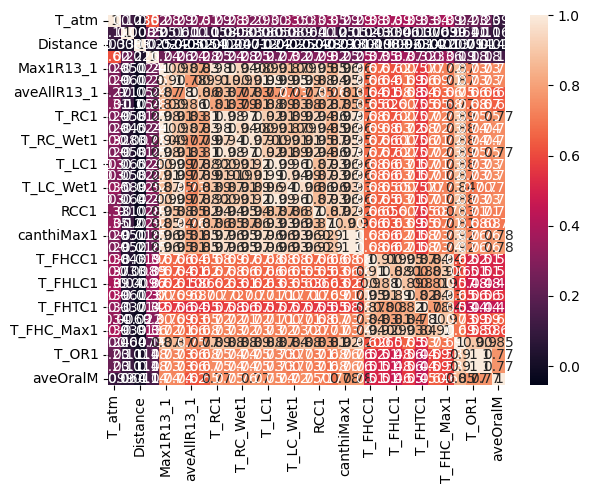

T_Max1         0.849657
canthiMax1     0.784096
canthi4Max1    0.783763
T_RC_Max1      0.769463
T_RC1          0.768730
T_OR1          0.767345
T_OR_Max1      0.766911
T_RC_Wet1      0.760134
T_LC_Max1      0.750527
T_LC1          0.750390
T_RC_Dry1      0.748566
T_LC_Dry1      0.743656
Max1R13_1      0.741902
Max1L13_1      0.735644
T_LC_Wet1      0.720383
RCC1           0.714193
LCC1           0.696752
aveAllL13_1    0.645084
T_FH_Max1      0.641727
aveAllR13_1    0.620874
T_FHC_Max1     0.595470
T_FHBC1        0.552362
T_FHRC1        0.514298
T_FHCC1        0.513335
T_FHLC1        0.463579
T_FHTC1        0.454889
T_offset1      0.139041
T_atm          0.098663
Humidity       0.063595
Distance       0.011181
Name: aveOralM, dtype: float64


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

combined = pd.concat([X, y], axis=1)
combined_dropped = combined.drop(columns='aveOralF')

corr_matrix = combined_dropped.corr(numeric_only=True) # Calculate the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

target_corr = corr_matrix['aveOralM'].drop('aveOralM')           # Drop the target-to-target correlation
sorted_corr = target_corr.abs().sort_values(ascending=False)
print(sorted_corr)

In [10]:
X1 = X_cleaned[['Age','T_Max1','canthiMax1','canthi4Max1','T_RC_Max1']]
Y1 = y_cleaned[['aveOralM']]

print(X1.shape)
print(Y1.shape)

(1018, 5)
(1018, 1)


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

r = np.random.randint(104)

X_train1 , X_test1 , Y_train1, Y_test1 = train_test_split(X1 , Y1 ,test_size =0.2 , random_state = r)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train1, Y_train1)

LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error

y_predicted1= model.predict(X_test1)
mean_squared_error = mean_squared_error(Y_test1, y_predicted1)

print("Mean squared error: ", mean_squared_error)

Mean squared error:  0.07568299867361777


In [14]:
print("Intercept: \n", model.intercept_)

coefficients = pd.Series(model.coef_[0], index=X1.columns)
print("Estimated Coefficients for Independent Variables:")
print(coefficients)

Intercept: 
 [4.9151558]
Estimated Coefficients for Independent Variables:
Age            0.008188
T_Max1         0.834347
canthiMax1    -0.413000
canthi4Max1    0.305199
T_RC_Max1      0.164414
dtype: float64


In [15]:
most_significant_variable = coefficients.abs().idxmax()
print(most_significant_variable)

T_Max1


In [16]:
X2 = X_cleaned[['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']]
Y2 = y_cleaned[['aveOralM']]

In [17]:
X_train2 , X_test2 , Y_train2, Y_test2 = train_test_split (X2 , Y2 ,test_size =0.2 , random_state = r)

model2 = LinearRegression()
model2.fit(X_train2, Y_train2)

print("Intercept: \n", model2.intercept_)

coefficients2 = pd.Series(model2.coef_[0], index=X2.columns)
print("Estimated Coefficients for Independent Variables:")
print(coefficients2)

Intercept: 
 [7.03315036]
Estimated Coefficients for Independent Variables:
T_OR1        -0.574011
T_OR_Max1     1.126371
T_FHC_Max1   -0.067109
T_FH_Max1     0.353906
dtype: float64


In [18]:
from sklearn.metrics import mean_squared_error

y_predicted2= model2.predict(X_test2)
mean_squared_error = mean_squared_error(Y_test2, y_predicted2)

print("Mean squared error: ", mean_squared_error)

Mean squared error:  0.09528609174067412


In [19]:
y_predicted2 = model2.predict(X_train2)

RSS = np.sum((y_predicted2 - Y_train2)**2) # Residual Sum of Sqaures (RSS)
print('RSS =', RSS)

N=len(Y_train2)
print('Number of Datapoints =',N)

RSE = np.sqrt(RSS/(N-4-1)) # Residual Standard Error (RSE)
print('RSE =', RSE)

TSS = np.sum((Y_train2- np.mean(Y_train2))**2) # Total Sum of Squares (TSS)
print('TSS =', TSS)

R2 = (TSS - RSS)/TSS # R^2 Statistic
print('R2 =', R2)

RSS = aveOralM    74.491067
dtype: float64
Number of Datapoints = 814
RSE = aveOralM    0.303443
dtype: float64
TSS = aveOralM    217.053713
dtype: float64
R2 = aveOralM    0.656808
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [20]:
import numpy as np
from scipy.stats import t

sigma_squared = np.var(Y_train2 - y_predicted2)
coefficients = model2.coef_[0]
feature_names = ['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']

standard_errors = []
t_values = []
p_values = []

# Calculation the standard errors
for feature in feature_names:
    standard_error = sigma_squared[0] / np.sum((X_train2[feature] - np.mean(X_train2[feature])) ** 2)
    standard_errors.append(standard_error)

# Calculation the t-values
for i, standard_error in enumerate(standard_errors):
    t_value = coefficients[i] / np.sqrt(standard_error)
    t_values.append(t_value)

# Calculation the p-values
for t_value in t_values:
    p_value = t.sf(np.abs(t_value), len(feature_names) - 2)
    p_values.append(p_value)

print("Standard Errors:", standard_errors)
print("t-Values:", t_values)
print("p-Values:", p_values)


Standard Errors: [0.0003579312967813904, 0.00035820138603474724, 0.0003265622203862527, 0.00039450811616252823]
t-Values: [-30.34033752557006, 59.51381887197404, -3.713647813764362, 17.818027625027277]
p-Values: [0.000542278287505423, 0.00014110762735111376, 0.03273481271931284, 0.001567489891130552]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
<ipython-input-20-6b5fa9213193>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  standard_error = sigma_squared[0] / np.sum((X_train2[feature] - np.mean(X_train2[feature])) ** 2)
